In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
def cosine_similarity(a, b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [ ]:
data = pd.read_csv("mnist_train.csv")
data2 = pd.read_csv("mnist_train.csv")
data2 = data2.to_numpy()

data.head(5)
data.fillna(0, inplace = True)

standardScaler = StandardScaler()
data = standardScaler.fit_transform(data)

In [ ]:
X = data[:, 1:]
y = data[:,:1]

X_image = data2[:, 1:]

print(f"x shape: {X.shape} \n y shape : {y.shape}")

x shape: (60000, 784) 
 y shape : (60000, 1)


In [ ]:
def KMeansClustering(X, clusters_count, max_iters):
  sample_count = X.shape[0]

  initial_centroid_index = np.random.choice(sample_count, clusters_count, replace = False)

  centroids = X[initial_centroid_index]

  #print(centroids)

  for i in range (max_iters):
    old_centroids = centroids
    assigned_centroid = []
    for data_point in X:
      centroid_distance = [cosine_similarity(data_point, centroid) for centroid in centroids]
      cluster_id = np.argmax(centroid_distance)
      assigned_centroid.append(cluster_id)

    assigned_centroid = np.array(assigned_centroid)
    clusters = [[] for _ in range (clusters_count)]

    for i in range (sample_count):
        clusters[assigned_centroid[i]].append(i)

    new_centroids = []
    for idx in clusters:
        new_centroids.append(np.mean(X[idx], axis = 0))
    new_centroids = np.array(new_centroids)
    if np.all(new_centroids == centroids):
        break

    centroids = new_centroids


  return assigned_centroid, centroids, clusters

In [ ]:
assigned_centroid, centroids, clusters = KMeansClustering(X, 10,100)

In [ ]:
#printing 10 images from each cluster

def showFigure(imcount, clusters):
  for i in range(len(clusters)):
      plt.figure(figsize=(10,4))
      plt.suptitle(f'cluster {i+1}')
      for index in range(imcount):
        image = X_image[clusters[i][index], :]
        ax = plt.subplot(2, imcount, index + 1)
        plt.imshow(image.reshape(28, 28))
        plt.gray()
      plt.show()

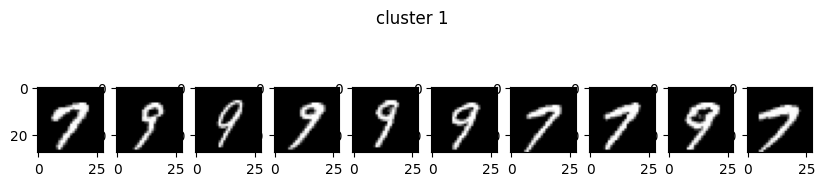

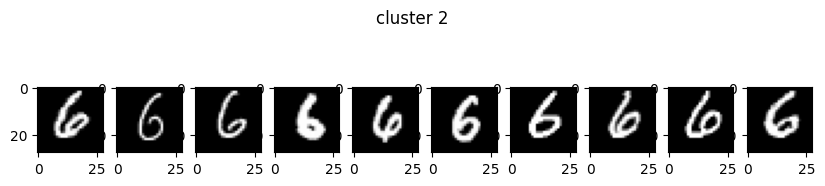

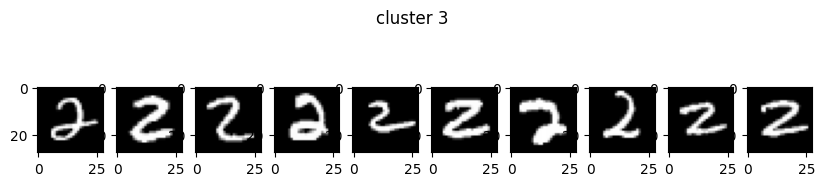

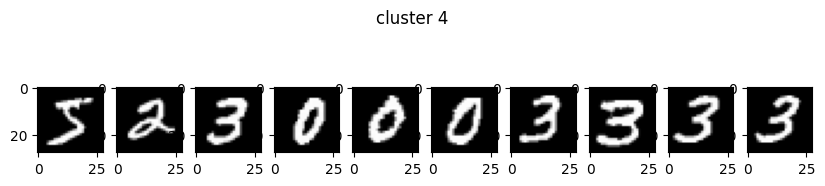

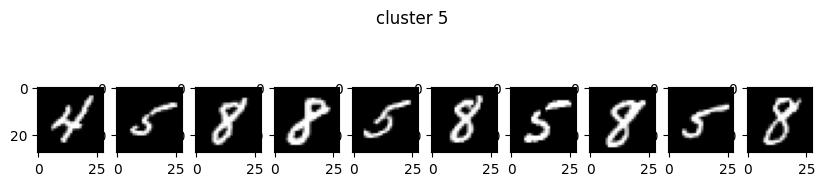

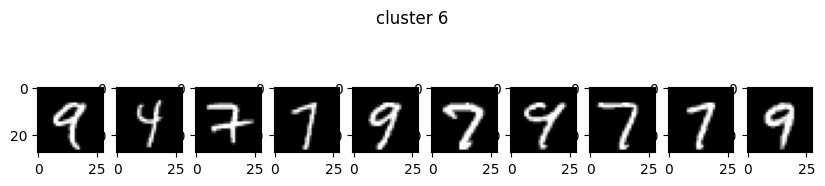

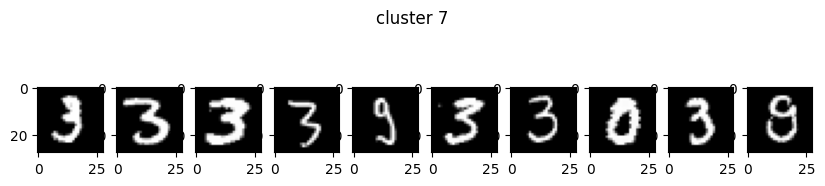

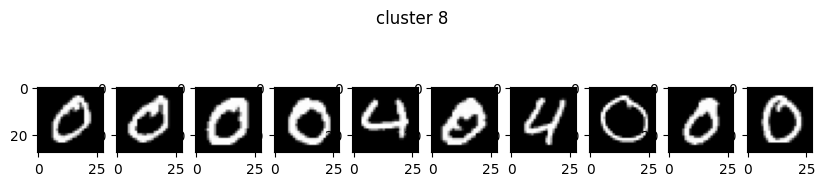

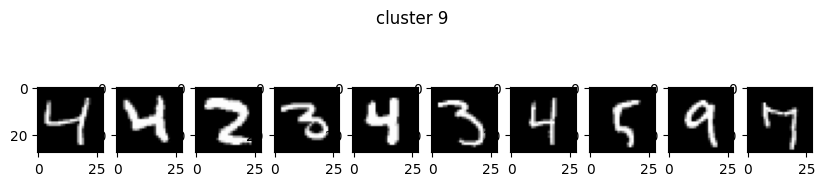

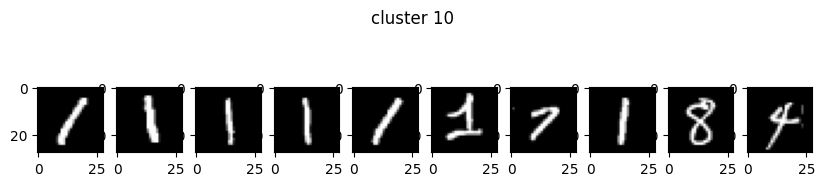

In [ ]:
showFigure(10,clusters)

In [ ]:
assigned_centroid, centroids, clusters7 = KMeansClustering(X, 7,100)
assigned_centroid, centroids, clusters4 = KMeansClustering(X, 4,100)

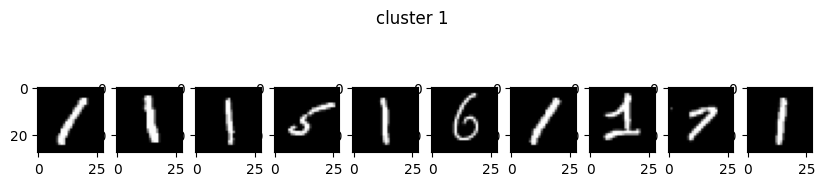

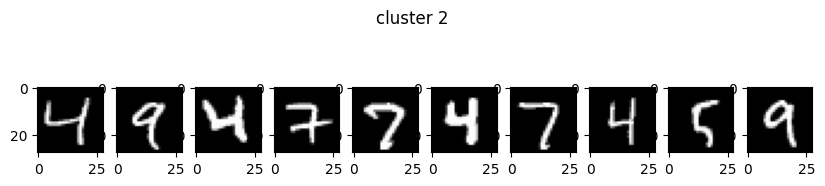

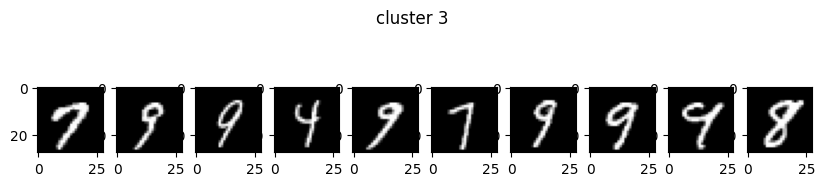

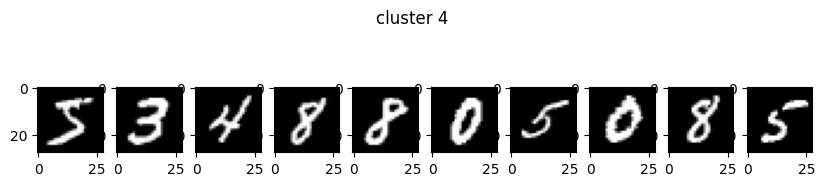

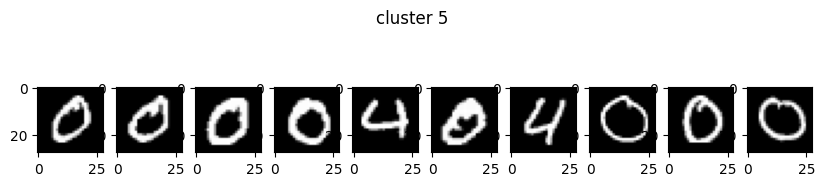

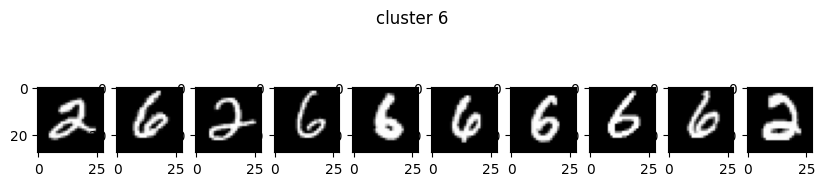

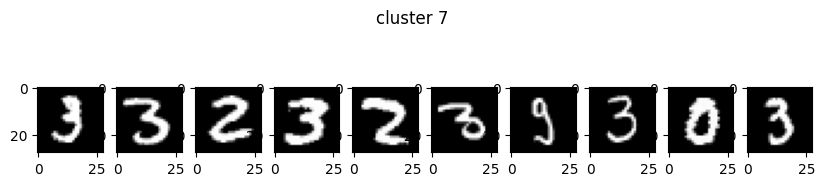

In [ ]:
showFigure(10, clusters7)

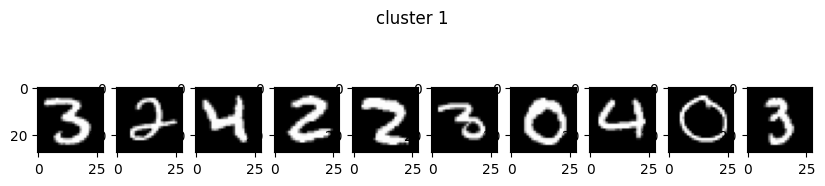

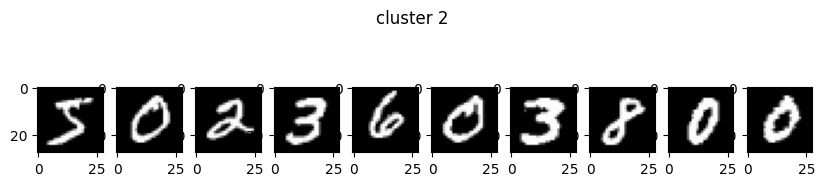

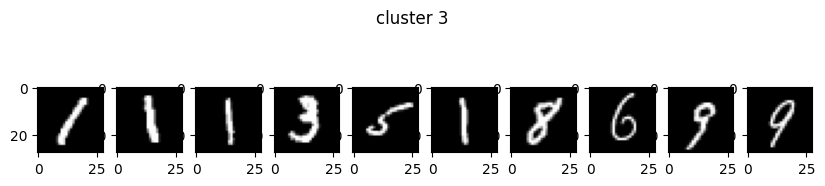

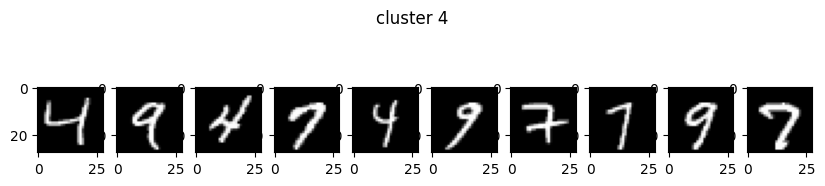

In [ ]:
showFigure(10, clusters4)